## Importing Libraries

In [ ]:
import matplotlib.pyplot as plt  
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import random
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout,Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.metrics import confusion_matrix
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip '/content/drive/My Drive/required_files'

Archive:  /content/drive/My Drive/required_files.zip
  inflating: haarcascade_frontalface_default.xml  
  inflating: model-005.model         
  inflating: model-004.model         
  inflating: model-003.model         
  inflating: model-008.model         
  inflating: model-006.model         
  inflating: model-001.model         
  inflating: model-002.model         
  inflating: target.npy              
  inflating: model-010.model         
  inflating: model-012.model         
  inflating: model-009.model         
  inflating: model-016.model         
  inflating: model-014.model         
  inflating: data.npy                


In [ ]:
X = np.load('/content/data.npy')
Y = np.load('/content/target.npy')

## Viewing Dataset

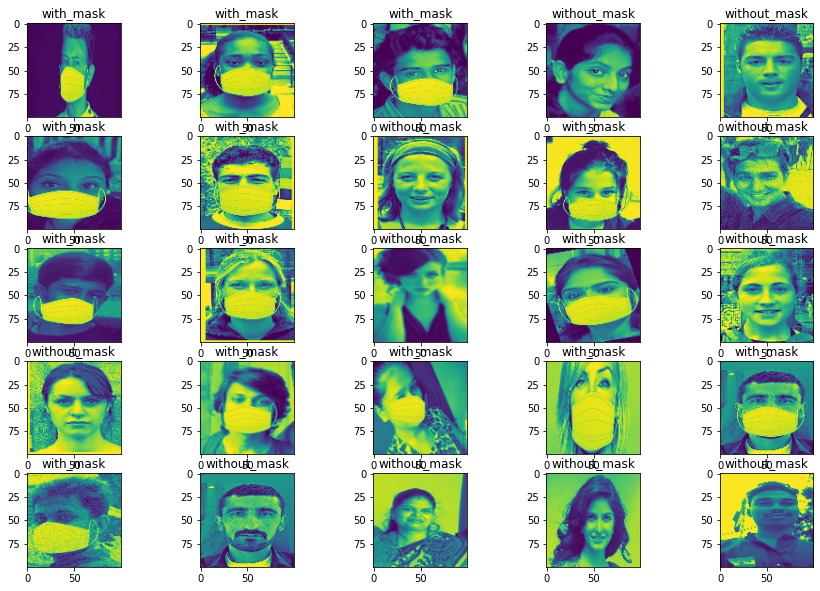

In [ ]:
count = 1 
def mask_map(val):
  label_dict = {'without_mask':[1,0],'with_mask':[0,1]}
  output = 0
  for key in label_dict:
    if (label_dict[key]==val).all():
      output = key
  return output
labels = [mask_map(y) for y in Y]
sample = random.sample(list(range(X.shape[0])),25)
for i in sample:
  plt.rcParams['figure.figsize']=(15,10)
  plt.subplot(5,5,count)
  plt.imshow(X[i].reshape(100,100))
  plt.title(labels[i])
  count+=1

## Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,shuffle=True,random_state=0,stratify=Y)

In [ ]:
print("Train data shape:",X_train.shape)
print("Test data shape:",X_test.shape)

Train data shape: (1238, 100, 100, 1)
Test data shape: (138, 100, 100, 1)


## Using Image Data Generator for train test data

In [ ]:
train_gen = ImageDataGenerator(zoom_range=0.2,shear_range=0.2, horizontal_flip=True)
train_gen.fit(X_train)
val_gen = ImageDataGenerator()
val_gen.fit(X_test)

##Improved model: Using Convolutional Neural Network

In [ ]:
model = load_model('/content/model-001.model')
model.compile(optimizer='Adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 200)       2000      
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 52900)            

In [ ]:
training = model.fit(train_gen.flow(X_train,Y_train,batch_size=32),steps_per_epoch=39,epochs=20
                     ,validation_data=val_gen.flow(X_test,Y_test))

Epoch 1/20
39/39 [==============================] - 77s 2s/step - loss: 0.6719 - accuracy: 0.5759 - val_loss: 0.6469 - val_accuracy: 0.6087
Epoch 2/20
39/39 [==============================] - 77s 2s/step - loss: 0.5149 - accuracy: 0.7536 - val_loss: 0.4387 - val_accuracy: 0.8623
Epoch 3/20
39/39 [==============================] - 76s 2s/step - loss: 0.3775 - accuracy: 0.8465 - val_loss: 0.3384 - val_accuracy: 0.8333
Epoch 4/20
39/39 [==============================] - 76s 2s/step - loss: 0.2382 - accuracy: 0.9184 - val_loss: 0.2655 - val_accuracy: 0.9130
Epoch 5/20
39/39 [==============================] - 80s 2s/step - loss: 0.2345 - accuracy: 0.9103 - val_loss: 0.2269 - val_accuracy: 0.9203
Epoch 6/20
39/39 [==============================] - 76s 2s/step - loss: 0.1877 - accuracy: 0.9289 - val_loss: 0.1804 - val_accuracy: 0.9348
Epoch 7/20
39/39 [==============================] - 76s 2s/step - loss: 0.1837 - accuracy: 0.9313 - val_loss: 0.2485 - val_accuracy: 0.9130
Epoch 8/20
39/39 [==

### Accuracy, Loss vs Epoch curve

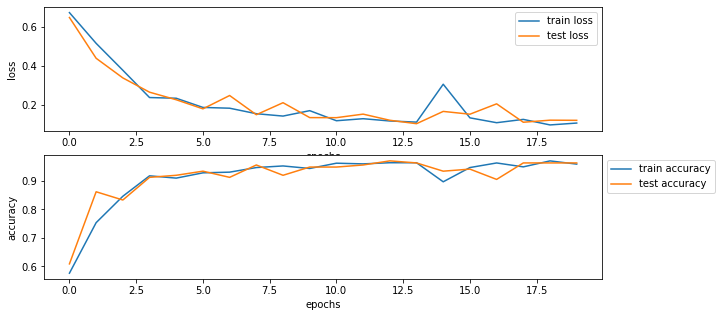

In [ ]:
train_loss = training.history['loss']
train_accuracy = training.history['accuracy']
val_loss = training.history['val_loss']
val_accuracy = training.history['val_accuracy']
plt.rcParams['figure.figsize']=(10,5)
plt.subplot(2,1,1)
plt.plot(train_loss)
plt.plot(val_loss)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train loss','test loss'],bbox_to_anchor=(1, 1))
plt.subplot(2,1,2)
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train accuracy','test accuracy'],bbox_to_anchor=(1, 1))

### Confusion matrix: Estimating Per class accuracy

Text(0.5, 1.0, '0:without_mask, 1:with_mask')

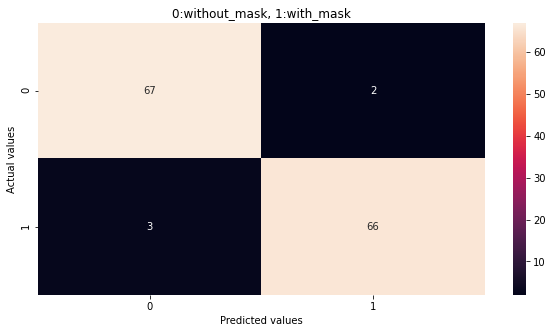

In [ ]:
encoded_pred = np.round_(model.predict(X_test))
temp = [mask_map(pred) for pred in encoded_pred]
Y_pred = [1 if val=='with_mask' else 0 for val in temp]
temp = [mask_map(true_val) for true_val in Y_test]
Y_true = [1 if val=='with_mask' else 0 for val in temp]
sns.heatmap(confusion_matrix(Y_true,Y_pred),annot=True)
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('0:without_mask, 1:with_mask')

Per class accuracy for test data: 
* without_mask = 67/(67+2) = 0.97
* with_mask = 66/(66+3) = 0.95

### Saving Model

In [ ]:
model.save_weights('mask_detector_weights.h5')
model_config = model.to_json()
with open('model_config.json','w') as json_file:
  json_file.write(model_config) 

##Simple FeedForward Neural Network

In [ ]:
model_2 = Sequential()
model_2.add(Flatten(input_shape=(100,100,1)))
model_2.add(Dense(128,activation='relu'))
model_2.add(Dense(2,activation='softmax'))
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1280128   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 1,280,386
Trainable params: 1,280,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training = model_2.fit(train_gen.flow(X_train,Y_train,batch_size=32),steps_per_epoch=39,epochs=20
                     ,validation_data=val_gen.flow(X_test,Y_test))

Epoch 1/20
39/39 [==============================] - 1s 37ms/step - loss: 1.4991 - accuracy: 0.6123 - val_loss: 0.5905 - val_accuracy: 0.7174
Epoch 2/20
39/39 [==============================] - 1s 34ms/step - loss: 0.5360 - accuracy: 0.7318 - val_loss: 0.6269 - val_accuracy: 0.6667
Epoch 3/20
39/39 [==============================] - 1s 34ms/step - loss: 0.6132 - accuracy: 0.7027 - val_loss: 0.6145 - val_accuracy: 0.7174
Epoch 4/20
39/39 [==============================] - 1s 35ms/step - loss: 0.5966 - accuracy: 0.7213 - val_loss: 0.6017 - val_accuracy: 0.7174
Epoch 5/20
39/39 [==============================] - 1s 34ms/step - loss: 0.5607 - accuracy: 0.7326 - val_loss: 0.5714 - val_accuracy: 0.7029
Epoch 6/20
39/39 [==============================] - 1s 34ms/step - loss: 0.4901 - accuracy: 0.7722 - val_loss: 0.6185 - val_accuracy: 0.6667
Epoch 7/20
39/39 [==============================] - 1s 34ms/step - loss: 0.4964 - accuracy: 0.7690 - val_loss: 0.5990 - val_accuracy: 0.6884
Epoch 8/20
39

### Accuracy, Loss vs Epoch curve

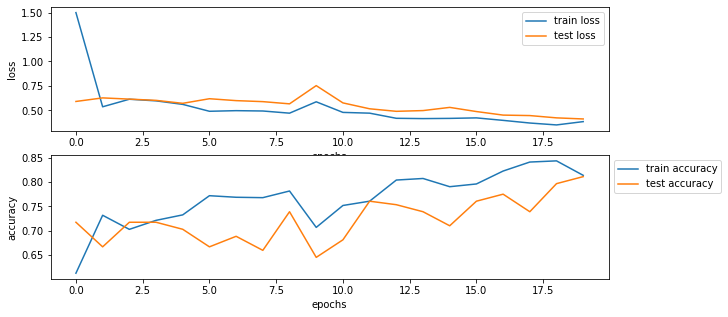

In [ ]:
train_loss = training.history['loss']
train_accuracy = training.history['accuracy']
val_loss = training.history['val_loss']
val_accuracy = training.history['val_accuracy']
plt.rcParams['figure.figsize']=(10,5)
plt.subplot(2,1,1)
plt.plot(train_loss)
plt.plot(val_loss)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train loss','test loss'],bbox_to_anchor=(1, 1))
plt.subplot(2,1,2)
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train accuracy','test accuracy'],bbox_to_anchor=(1, 1))

### Confusion matrix: Estimating Per class accuracy

Text(0.5, 1.0, '0:without_mask, 1:with_mask')

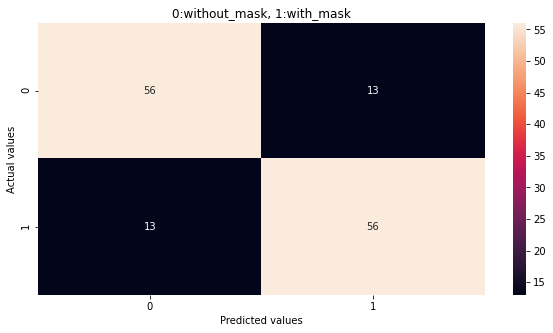

In [ ]:
encoded_pred = np.round_(model_2.predict(X_test))
temp = [mask_map(pred) for pred in encoded_pred]
Y_pred = [1 if val=='with_mask' else 0 for val in temp]
temp = [mask_map(true_val) for true_val in Y_test]
Y_true = [1 if val=='with_mask' else 0 for val in temp]
sns.heatmap(confusion_matrix(Y_true,Y_pred),annot=True)
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('0:without_mask, 1:with_mask')

Per class accuracy for test data: 
* without_mask = 56/(56+13) = 0.81
* with_mask = 56/(56+13) = 0.81




### Saving Model

In [ ]:
model_2.save_weights('NN_mask_detector_weights.h5')
model_config = model_2.to_json()
with open('NN_model_config.json','w') as json_file:
  json_file.write(model_config) 